<a href="https://colab.research.google.com/github/abhishekchauhan062003/CODSOFT/blob/main/CoustumerChurnDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 55.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
path = "/root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv"
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
unwanted_columns = ['RowNumber', 'Surname', 'Gender']
df.drop(unwanted_columns, axis=1, inplace=True)

In [10]:
df.shape

(10000, 11)

In [12]:
df.isnull().values.any()

False

In [32]:
exited = df.loc[df['Exited'] == 1]
notexited = df.loc[df['Exited'] == 0]
print(exited.shape,notexited.shape)

(2037, 10) (7963, 10)


In [33]:
notexited = notexited.sample(exited.shape[0])
data = pd.concat([exited,notexited])
data.shape

(4074, 10)

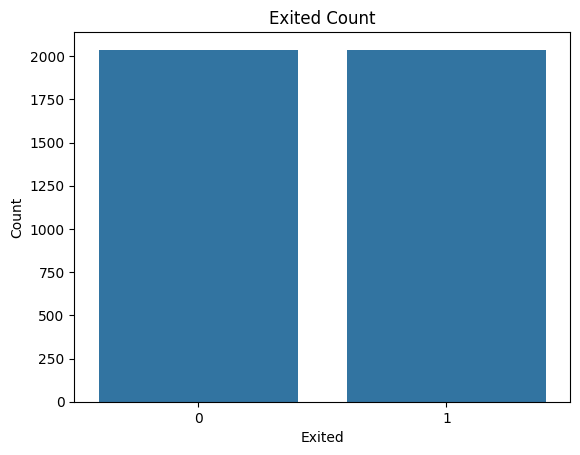

In [34]:
exited_counts = data['Exited'].value_counts()
sns.barplot(x=exited_counts.index,y=exited_counts.values)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Exited Count')
plt.show()

In [35]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,24,-1.041760,0,1,1,1,0.021886,1
1,-0.440036,2,23,-1.387538,743,1,0,1,0.216534,0
2,-1.536794,0,24,1.032908,5793,3,1,0,0.240687,1
3,0.501521,0,21,-1.387538,0,2,0,0,-0.108918,0
4,2.063884,2,25,-1.041760,3696,1,1,1,-0.365276,0


In [36]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Age'] = encoder.fit_transform(df['Age'])
df['Balance'] = encoder.fit_transform(df['Balance'])


In [38]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,24,-1.041760,0,1,1,1,0.021886,1
1,-0.440036,2,23,-1.387538,743,1,0,1,0.216534,0
2,-1.536794,0,24,1.032908,5793,3,1,0,0.240687,1
3,0.501521,0,21,-1.387538,0,2,0,0,-0.108918,0
4,2.063884,2,25,-1.041760,3696,1,1,1,-0.365276,0


In [39]:
scalar = StandardScaler()
df['CreditScore'] = scalar.fit_transform(df['CreditScore'].values.reshape(-1,1))
df['Age'] = scalar.fit_transform(df['Age'].values.reshape(-1,1))
df['Tenure'] = scalar.fit_transform(df['Tenure'].values.reshape(-1,1))
df['EstimatedSalary'] = scalar.fit_transform(df['EstimatedSalary'].values.reshape(-1,1))

In [41]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0.293793,-1.041760,0,1,1,1,0.021886,1
1,-0.440036,2,0.198387,-1.387538,743,1,0,1,0.216534,0
2,-1.536794,0,0.293793,1.032908,5793,3,1,0,0.240687,1
3,0.501521,0,0.007575,-1.387538,0,2,0,0,-0.108918,0
4,2.063884,2,0.389199,-1.041760,3696,1,1,1,-0.365276,0


In [42]:
X=data.drop('Exited',axis=1)
y=data['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,24,-1.041760,0,1,1,1,0.021886,1
2,-1.536794,0,24,1.032908,5793,3,1,0,0.240687,1
5,-0.057205,2,26,1.032908,2674,2,1,0,0.863650,1
7,-2.840488,1,11,-0.350204,2781,4,1,0,0.334854,1
16,0.025569,1,40,-1.387538,4293,1,1,0,-1.651826,1


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

## GRADEINT BOOSTING CLASSIFIER

In [45]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)

In [46]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.7607361963190185
Precision: 0.8054187192118226
Recall: 0.7381489841986456
F1 score: 0.7703180212014135
Confusion matrix: [[293  79]
 [116 327]]


Text(0.5, 1.0, 'Confusion Matrix')

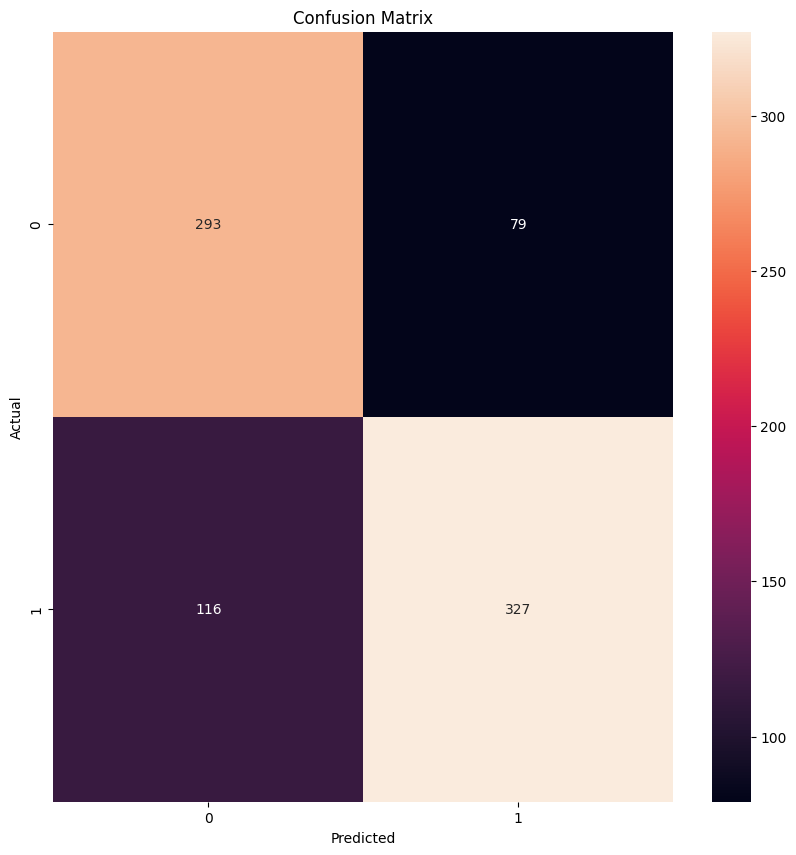

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## RANDOM FOREST

In [48]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

In [49]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.7460122699386503
Precision: 0.795
Recall: 0.7178329571106095
F1 score: 0.7544483985765125
Confusion matrix: [[290  82]
 [125 318]]


Text(0.5, 1.0, 'Confusion Matrix')

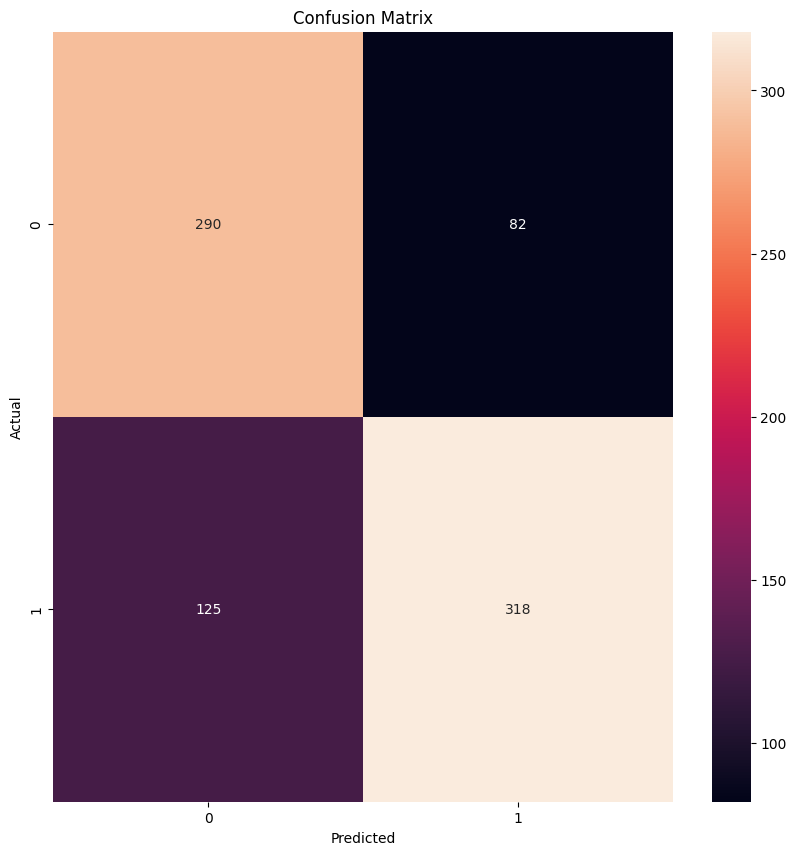

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## DECISION TREE

In [51]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

In [52]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.7165644171779141
Precision: 0.7585365853658537
Recall: 0.7020316027088036
F1 score: 0.7291910902696366
Confusion matrix: [[273  99]
 [132 311]]


Text(0.5, 1.0, 'Confusion Matrix')

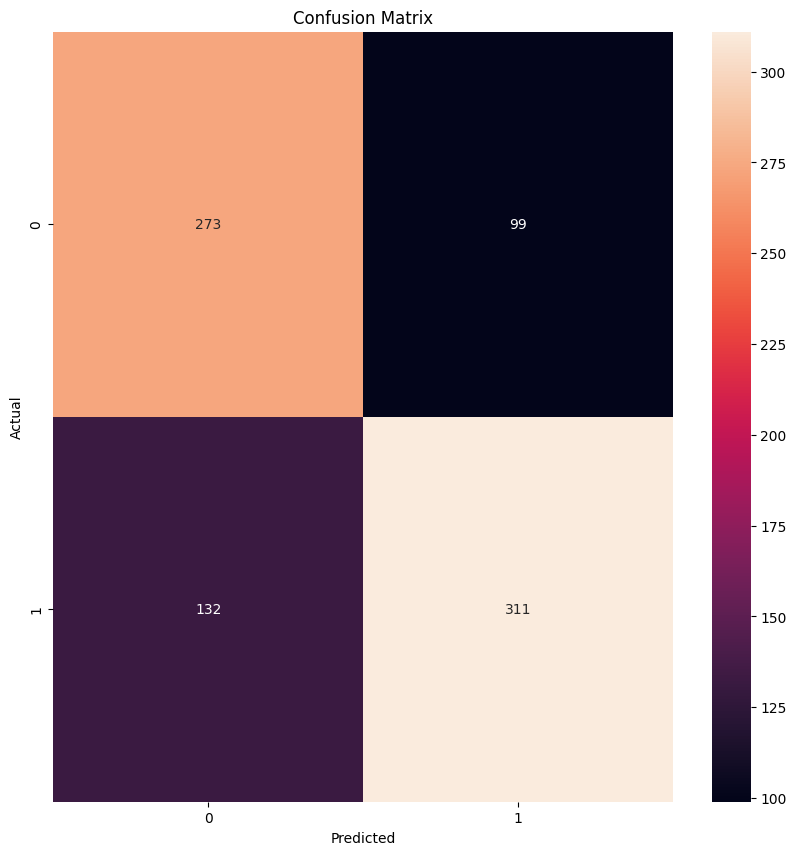

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')